In [1]:
from sympy import *
init_printing()

In [29]:
R1,R2,R3,R4,R5,C1,C2 = symbols('R1 R2 R3 R4 R5 C1 C2')
VA, VB = symbols('V_A V_B')
a0,a1,b0,b1,b2 = symbols('a_0 a_1 b_0 b_1 b_2')
t = symbols('t',real = True)
x,y = symbols('x y')
s = symbols('s')
K = symbols('K', real = True)
lowpassParam = {K:1+R4/R3,R1: 3.9894e3, R2 : 0.8865e3, R3:1e3, R4:1e3,C1:1795.2e-9,C2:398.94e-9}
highpassParam = {R1: 1784.1e3, R2 : 892.06e3, R3:1e3, R4:1e3,C1:1784.1e-9,C2:3568.2e-9}
bandpassParam = {R1: 56.419e3, R2 : 34.117e3, R3:149.72e3, R4:1e3,R5:1e3,C1:56.419e-9,C2:56.419e-9}
VC1,VC2 = symbols('V_{C1} V_{C2}', real = True)
ICS = {VC1:1,VC2:-1}

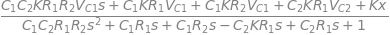

In [10]:
eqA = (x-VA)/R1+C2*VC2 + s*C2*(y-VA)+(VB-VA)/R2
eqB = (VA-VB)/R2 + C1*VC1 + s*C1*(0-VB)
eqK = y-K*VB
ys = solve([eqA,eqB,eqK],[y,VA,VB])[y]
ys

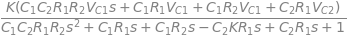

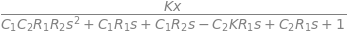

In [17]:
zi = (ys.subs(x,0)).simplify()
zs = (ys-zi).simplify()
display(zi,zs)

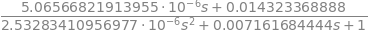

In [32]:
zi0 = simplify(zi.subs(lowpassParam).subs(ICS))
zs0 = simplify(zs.subs(lowpassParam).subs(ICS))

display(zi0,zs0)

In [38]:
inverse_laplace_transform(apart(zi0,s),s,t)

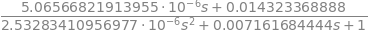

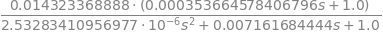

In [51]:
display(zi0)
zi0.factor(s)

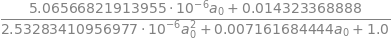

In [65]:
inverse_laplace_transform(numer(zi0)/prod([s-s0 for s0 in solve(denom(zi0),s)]),s,t)

In [99]:
zi0den = prod([s-s0 for s0 in solve(denom(zi0),s)])
denomfactor = (denom(zi0)/zi0den).subs(s,1)
aparted = apart(numer(zi0)/denomfactor/zi0den,s,full=True).doit()
aparted

In [100]:
inverse_laplace_transform(aparted,s,t)